# Aeromexico vs Volaris vs Viva: Evaluación de Métricas Financieras y Operacionales

Comparativa entre las 3 aerolíneas más importantes del mercado mexicano desde el año 2016, que es el reporte más antiguo disponible de Viva (antes Vivaaerobus), hasta el tercer trimestre de 2022, último reporte público disponible de Aeroméxico.


Para este ejercicio se hara la comparativa de las métricas ASK, RPK, % Ocupación, Pasajeros, YIELD,TRASK,RASK, CASK y Load Factor.


¿Cómo se calculan estas variables? A continuación explicamos cada una:


PRASK (Passenger Revenue per Available Seat Kilometer): Mide el ingreso de pasajeros generado por cada kilómetro de asiento disponible.

$$
\text{PRASK} = \frac{\text{Ingresos Pasajeros}}{\text{ASK}}
$$

TRASK (Total Revenue per Available Seat Kilometer): Mide el ingreso total generado por cada kilómetro de asiento disponible.

$$
\text{TRASK} = \frac{\text{Ingresos Totales}}{\text{ASK}}
$$

CASK (Cost per Available Seat Kilometer): Representa el costo operativo total por cada kilómetro de asiento disponible.

$$
\text{CASK} = \frac{\text{Gastos Operativos Totales}}{\text{ASK}}
$$

YIELD: Es una métrica de rentabilidad directa, que muestra cuánto gana la aerolínea por cada kilómetro volado por un pasajero.

$$
\text{Yield} = \frac{\text{Ingreso Pasajeros}}{\text{RPK}}
$$

Load Factor (Factor de Ocupación): El Load Factor mide la eficiencia de la capacidad utilizada en comparación con la capacidad total disponible. Se calcula dividiendo el RPK entre el ASK y se expresa como un porcentaje.

$$
\text{Load Factor} = \frac{\text{RPK}}{\text{ASK}} \times 100
$$

##1.- Carga de Datos

En este punto nos encontramos importando los datos trimestrales de cada aerolinea y convirtiendolos a un dataframe para facilitar la visualización

In [103]:
import pandas as pd
import numpy as np

In [104]:
volaristrim=pd.read_excel("/content/aerolineas.xlsx",sheet_name="VOLARIS TRIM")

In [105]:
vivatrim=pd.read_excel("/content/aerolineas.xlsx",sheet_name="VIVA TRIM")

In [106]:
amtrim=pd.read_excel("/content/aerolineas.xlsx",sheet_name="AEROMEXICO TRIM")

##2.- Estructura y Exploración de los Datos

A continuación, se presentan las columnas y filas que conforman cada DataFrame, junto con el conteo de valores no nulos en cada columna y el tipo de dato correspondiente. Este análisis preliminar nos permite comprender la estructura de los datos y detectar posibles valores faltantes o inconsistencias que puedan afectar el análisis posterior.

In [107]:
volaristrim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 31 columns):
 #   Column                                                               Non-Null Count  Dtype         
---  ------                                                               --------------  -----         
 0   TRIMESTRE                                                            35 non-null     datetime64[ns]
 1   ASM (millones)                                                       35 non-null     int64         
 2   RPM (millones)                                                       35 non-null     int64         
 3   FACTOR OCUPACION                                                     35 non-null     float64       
 4   TOTAL PASAJEROS (MILES)                                              35 non-null     int64         
 5   YIELD (PASAJE / RPM) centavos                                        11 non-null     float64       
 6   TRASM (Ingreso Total / ASM) centavos                

In [108]:
vivatrim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   TRIMESTRE                                           35 non-null     datetime64[ns]
 1   ASK                                                 24 non-null     float64       
 2   RPK                                                 24 non-null     float64       
 3   ASM                                                 21 non-null     float64       
 4   RPM                                                 21 non-null     float64       
 5   TOTAL PASAJEROS (MILES)                             35 non-null     float64       
 6   FACTOR OCUPACION                                    35 non-null     float64       
 7   RASK                                                23 non-null     float64       
 8   CASK        

In [109]:
amtrim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 31 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   TRIMESTRE                                                 35 non-null     datetime64[ns]
 1   ASK                                                       27 non-null     float64       
 2   RPK                                                       27 non-null     float64       
 3   FACTOR OCUPACION                                          27 non-null     float64       
 4   TOTAL PASAJEROS (MILES)                                   27 non-null     float64       
 5   YIELD (PASAJE / RPK)                                      27 non-null     float64       
 6   TRASK (Ingreso Total / ASK)                               27 non-null     float64       
 7   RASK (Pasaje / ASK)                           

En este punto he revisado las columnas de cada DataFrame para asegurar que contienen los datos esperados, como ingresos, pasajeros, ASK/RPK (ASM/RPM), etc y he verificado que hay valores nulos o inconsistencias que puedan afectar el análisis por lo cual procederemos a limpiarlos y realizar los ajustes necesarios.

##3.- Limpieza de Datos

###AEROMEXICO

Para esta comparativa decidimos trabajar con valores en KM y pesos mexicanos. Como se puede observar Volaris trabaja sus reportes trimestrales en millas y USD y Viva por un periodo trabajo con kilometros y despues paso todos sus valores a millas. Al Aeromexico tener más estructurados sus reportes nos apegaremos más a su formato.

Empezare por limpiar los valores nulos del dataset de Aeromexico y posteriormente a generar el "Load Factor"

In [110]:
amtrim.drop(range(27,35),inplace=True)

In [111]:
amtrim.fillna(0,inplace=True)

In [112]:
amtrim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 31 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   TRIMESTRE                                                 27 non-null     datetime64[ns]
 1   ASK                                                       27 non-null     float64       
 2   RPK                                                       27 non-null     float64       
 3   FACTOR OCUPACION                                          27 non-null     float64       
 4   TOTAL PASAJEROS (MILES)                                   27 non-null     float64       
 5   YIELD (PASAJE / RPK)                                      27 non-null     float64       
 6   TRASK (Ingreso Total / ASK)                               27 non-null     float64       
 7   RASK (Pasaje / ASK)                           

In [113]:
amtrim["LOAD FACTOR RPK/ASK"]=(amtrim["RPK"]/amtrim["ASK"])*100
amtrim=amtrim.rename(columns={"RASK (Pasaje / ASK)": "PRASK (Pasaje / ASK)"})
amtrim["LOAD FACTOR RPK/ASK"]=amtrim["LOAD FACTOR RPK/ASK"]/100

In [114]:
amtrim.columns

Index(['TRIMESTRE', 'ASK', 'RPK', 'FACTOR OCUPACION',
       'TOTAL PASAJEROS (MILES)', 'YIELD (PASAJE / RPK)',
       'TRASK (Ingreso Total / ASK)', 'PRASK (Pasaje / ASK)',
       'CASK (Costo Total / ASK)', 'INGRESOS OPERACIONALES (Pasajeros)',
       'INGRESOS OPERACIONALES (Otros Ingresos)',
       'TOTAL INGRESOS OPERACIONALES',
       'GASTOS OPERACIONALES (Fuerza de Trabajo)',
       'GASTOS OPERACIONALES (Combustible)',
       'GASTOS OPERACIONALES (Mantenimiento)',
       'GASTOS OPERACIONALES (Tráfico Escala)',
       'GASTOS OPERACIONALES (Servicio Pasajero)',
       'GASTOS OPERACIONALES (Venta & Admin) ', 'GASTOS OPERACIONALES (Otros)',
       'GASTOS OPERACIONALES (Negocios Conjuntos)',
       'GASTOS OPERACIONALES (Reestructura)', 'TOTAL GASTOS OPERACIONALES',
       'UAFIDAR (MILLONES)', 'GASTOS (Rentas, Depreciación y Amortización)',
       'Deterioro de Propiedades y Equipo', 'TOTAL GASTOS (OP, VENTA, DAR)',
       'UTILIDAD OPERACIÓN (Pérdida antes de Gastos Financie

In [115]:
am_metrics=amtrim[['TRIMESTRE','ASK', 'RPK','YIELD (PASAJE / RPK)','LOAD FACTOR RPK/ASK',
       'TRASK (Ingreso Total / ASK)', 'PRASK (Pasaje / ASK)',
       'FACTOR OCUPACION','CASK (Costo Total / ASK)','UAFIDAR (MILLONES)',"TOTAL PASAJEROS (MILES)"]].copy()

In [116]:
am_metrics.head()

,TRIMESTRE,ASK,RPK,YIELD (PASAJE / RPK),LOAD FACTOR RPK/ASK,TRASK (Ingreso Total / ASK),PRASK (Pasaje / ASK),FACTOR OCUPACION,CASK (Costo Total / ASK),UAFIDAR (MILLONES),TOTAL PASAJEROS (MILES)
0,2016-03-31,10386.0,7917.0,1.398,0.762276,1.161,1.049,0.763,1.110,3077.0,4493.0
1,2016-06-30,10616.0,8420.0,1.304,0.793142,1.160,1.018,0.794,1.141,2911.0,4846.0
2,2016-09-30,11176.0,9442.0,1.400,0.844846,1.295,1.161,0.845,1.170,4063.0,5258.0
3,2016-12-31,11182.0,8997.0,1.470,0.804597,1.344,1.163,0.805,1.256,3691.0,5106.0
4,2017-03-31,11204.0,8734.0,1.406,0.779543,1.265,1.078,0.780,1.309,3583.0,4777.0


###VIVA (VIVAAEROBUS)

A continuacion haremos la limpieza de Viva primeramente con un ejercicio ejemplo para convertir ASM en ASK y RPM en RPK. En este caso la única opcion que encuentro para validar que la conversión sea correcta en el dataset de Viva es el periodo del 2021 donde encontramos las 4 metricas proporcionadas por la aerolinea en sus reportes.

In [117]:
vivatrim.iloc[range(20,24)][["TRIMESTRE","ASK","RPK","ASM","RPM"]]

,TRIMESTRE,ASK,RPK,ASM,RPM
20,2021-03-31,3756.0,2936.0,2334.0,1824.0
21,2021-06-30,5124.0,4409.0,3184.0,2740.0
22,2021-09-30,6083.0,4998.0,3780.0,3106.0
23,2021-12-31,6368.0,5467.0,3957.0,3397.0


Como sabemos 1 milla equivale a 1.60934 km por lo cual para convertir ASM o RPM en su variante en Kilometros bastaria con multiplicar el valor por la equivalencia de una milla en kilometros ASM de 2,334 * 1.6093 = 3756.10

In [118]:
vivatrim["ASK"]=vivatrim["ASK"].fillna(vivatrim["ASM"]*1.60934)
vivatrim["RPK"]=vivatrim["RPK"].fillna(vivatrim["RPM"]*1.60934)

In [119]:
vivatrim.head()

,TRIMESTRE,ASK,RPK,ASM,RPM,TOTAL PASAJEROS (MILES),FACTOR OCUPACION,RASK,CASK,RASM,...,GASTOS OPERACIONALES (Depreciación y Amortizacion),GASTOS OPERACIONALES (Derecho Uso Aereo),TOTAL GASTOS OPERACIONALES,UTILIDAD OPERACIONAL (MILLONES),INGRESO FINANCIERO (millones),UTILIDAD ANTES DE IMPUESTOS,UTILIDAD NETA,UAFIDAR,TIPO DE CAMBIO,Unnamed: 33
0,2016-03-31,1425.8,1168.0,NaN,NaN,1176.4,0.819,82.0,69.7,NaN,...,NaN,NaN,993.9,175.1,2.9,178.1,160.3,491.4,0.00,NaN
1,2016-06-30,1772.2,1441.6,NaN,NaN,1409.2,0.813,74.3,67.4,NaN,...,NaN,NaN,1193.8,123.7,19.0,104.8,286.5,489.0,0.00,NaN
2,2016-09-30,2282.7,2015.1,NaN,NaN,1976.8,0.883,82.3,64.3,NaN,...,NaN,NaN,1468.6,410.9,19.5,430.4,307.5,879.3,0.00,NaN
3,2016-12-31,2110.4,1833.1,NaN,NaN,1811.3,0.869,87.6,89.6,NaN,...,NaN,NaN,1890.5,-41.7,176.2,134.6,182.6,739.0,19.84,NaN
4,2017-03-31,1912.1,1651.6,NaN,NaN,1628.4,0.864,69.8,75.2,NaN,...,NaN,NaN,1438.7,-104.0,60.5,-43.4,-22.9,256.6,20.36,NaN


In [120]:
vivatrim.columns

Index(['TRIMESTRE', 'ASK', 'RPK', 'ASM', 'RPM', 'TOTAL PASAJEROS (MILES)',
       'FACTOR OCUPACION', 'RASK', 'CASK', 'RASM', 'TRASK', 'CASM', 'TRASM',
       'COSTO POR ASIENTO', 'DISTANCIA PROMEDIO',
       'INGRESOS OPERACIONALES (Pasajeros)',
       'INGRESOS OPERACIONALES (Cargos por servicios)',
       'TOTAL INGRESOS OPERACIONALES', 'GASTOS OPERACIONALES (Combustible)',
       'GASTOS OPERACIONALES (Mantenimiento)',
       'GASTOS OPERACIONALES (Sueldos, Salarios)',
       'GASTOS OPERACIONALES (Rentas)',
       'GASTOS OPERACIONALES (Gastos de Administración)',
       'GASTOS OPERACIONALES (Otros Gastos)',
       'GASTOS OPERACIONALES (Depreciación y Amortizacion)',
       'GASTOS OPERACIONALES (Derecho Uso Aereo)',
       'TOTAL GASTOS OPERACIONALES', 'UTILIDAD OPERACIONAL (MILLONES)',
       'INGRESO FINANCIERO (millones)', 'UTILIDAD ANTES DE IMPUESTOS',
       'UTILIDAD NETA', 'UAFIDAR', 'TIPO DE CAMBIO', 'Unnamed: 33'],
      dtype='object')

Podemos observar valores nulos en las siguientes columnas. Estos valores faltantes no se registraron en su momento por diversas causas es posible que se omitieran, formaran parte de otro registro dentro del mismo estado financiero o en su defecto fuera tomado en cuenta dentro de otro factor dentro de los reportes trimestrales de la aerolinea por lo cual optamos por dejarlos asi.

In [121]:
vivatrim[['GASTOS OPERACIONALES (Combustible)',
       'GASTOS OPERACIONALES (Mantenimiento)',
       'GASTOS OPERACIONALES (Sueldos, Salarios)',
       'GASTOS OPERACIONALES (Rentas)',
       'GASTOS OPERACIONALES (Gastos de Administración)',
       'GASTOS OPERACIONALES (Otros Gastos)',
       'GASTOS OPERACIONALES (Depreciación y Amortizacion)',
       'GASTOS OPERACIONALES (Derecho Uso Aereo)',
       'TOTAL GASTOS OPERACIONALES', 'UTILIDAD OPERACIONAL (MILLONES)',
       'INGRESO FINANCIERO (millones)', 'UTILIDAD ANTES DE IMPUESTOS',
       'UTILIDAD NETA']]=vivatrim[['GASTOS OPERACIONALES (Combustible)',
       'GASTOS OPERACIONALES (Mantenimiento)',
       'GASTOS OPERACIONALES (Sueldos, Salarios)',
       'GASTOS OPERACIONALES (Rentas)',
       'GASTOS OPERACIONALES (Gastos de Administración)',
       'GASTOS OPERACIONALES (Otros Gastos)',
       'GASTOS OPERACIONALES (Depreciación y Amortizacion)',
       'GASTOS OPERACIONALES (Derecho Uso Aereo)',
       'TOTAL GASTOS OPERACIONALES', 'UTILIDAD OPERACIONAL (MILLONES)',
       'INGRESO FINANCIERO (millones)', 'UTILIDAD ANTES DE IMPUESTOS',
       'UTILIDAD NETA']].fillna(0)

Vamos eliminando columnas que por el momento no nos serviran y nos centraremos a llenar los valores faltantes en RASK, CASK y TRASK

In [122]:
vivatrim.drop(columns=["ASM","RPM","Unnamed: 33","COSTO POR ASIENTO","DISTANCIA PROMEDIO"],inplace=True)

In [123]:
vivatrim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 29 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   TRIMESTRE                                           35 non-null     datetime64[ns]
 1   ASK                                                 35 non-null     float64       
 2   RPK                                                 35 non-null     float64       
 3   TOTAL PASAJEROS (MILES)                             35 non-null     float64       
 4   FACTOR OCUPACION                                    35 non-null     float64       
 5   RASK                                                23 non-null     float64       
 6   CASK                                                23 non-null     float64       
 7   RASM                                                6 non-null      float64       
 8   TRASK       

En este apartado, podemos observar que existen valores nulos en algunas de las métricas debido a cambios en la forma en que estas se registraron en diferentes años. Este tipo de discontinuidades es común cuando las aerolíneas ajustan sus reportes o adoptan nuevas métricas a lo largo del tiempo.



In [124]:
vivatrim[['TRIMESTRE', 'ASK', 'RPK', 'TOTAL PASAJEROS (MILES)',
       'FACTOR OCUPACION', 'RASK', 'CASK', 'RASM', 'TRASK', 'CASM', 'TRASM',
       'INGRESOS OPERACIONALES (Pasajeros)',
       'INGRESOS OPERACIONALES (Cargos por servicios)','TOTAL INGRESOS OPERACIONALES','TOTAL GASTOS OPERACIONALES']].head()

,TRIMESTRE,ASK,RPK,TOTAL PASAJEROS (MILES),FACTOR OCUPACION,RASK,CASK,RASM,TRASK,CASM,TRASM,INGRESOS OPERACIONALES (Pasajeros),INGRESOS OPERACIONALES (Cargos por servicios),TOTAL INGRESOS OPERACIONALES,TOTAL GASTOS OPERACIONALES
0,2016-03-31,1425.8,1168.0,1176.4,0.819,82.0,69.7,NaN,NaN,NaN,NaN,686.2,482.9,1169.1,993.9
1,2016-06-30,1772.2,1441.6,1409.2,0.813,74.3,67.4,NaN,NaN,NaN,NaN,728.0,589.5,1317.5,1193.8
2,2016-09-30,2282.7,2015.1,1976.8,0.883,82.3,64.3,NaN,NaN,NaN,NaN,1265.5,614.0,1879.5,1468.6
3,2016-12-31,2110.4,1833.1,1811.3,0.869,87.6,89.6,NaN,NaN,NaN,NaN,979.6,869.2,1848.9,1890.5
4,2017-03-31,1912.1,1651.6,1628.4,0.864,69.8,75.2,NaN,NaN,NaN,NaN,734.6,600.1,1334.7,1438.7


En este punto, entendemos que RASK y TRASK suelen aparecer en documentos como la misma métrica, que se calcula como el total de ingresos operacionales dividido por el ASK. Por otro lado, el CASK representa el total de gastos operacionales dividido por el ASK.

Para estandarizar los datos y corregir posibles inconsistencias en los documentos, donde algunos valores ya estaban expresados en porcentaje (multiplicados por 100), aplicamos una condición que identifica aquellos valores mayores a 2 y los divide entre 100. Esto nos permite mantener todas las métricas en la misma escala y facilita la comparabilidad de los datos y renombramos las columnas.

In [125]:
vivatrim['RASK']=vivatrim['RASK'].fillna(vivatrim['TOTAL INGRESOS OPERACIONALES']/vivatrim['ASK'])

In [126]:
vivatrim['RASK']=vivatrim['RASK'].apply(lambda x: x/100 if x>2 else x)

In [127]:
vivatrim['CASK']=vivatrim['CASK'].fillna(vivatrim['TOTAL GASTOS OPERACIONALES']/vivatrim['ASK'])

In [128]:
vivatrim['CASK']=vivatrim['CASK'].apply(lambda x: x/100 if x>5 else x)

In [129]:
vivatrim=vivatrim.rename(columns={'RASK':'TRASK (Ingreso Total / ASK)'})
vivatrim=vivatrim.rename(columns={'CASK':'CASK (Costo Total / ASK)'})
vivatrim=vivatrim.rename(columns={'UAFIDAR':'UAFIDAR (MILLONES)'})

Creamos las métricas faltantes

In [130]:
vivatrim["PRASK (Pasaje / ASK)"]=vivatrim['INGRESOS OPERACIONALES (Pasajeros)']/vivatrim['ASK']
vivatrim["YIELD (PASAJE / RPK)"]=vivatrim['INGRESOS OPERACIONALES (Pasajeros)']/vivatrim['RPK']
vivatrim["LOAD FACTOR RPK/ASK"]=vivatrim["RPK"]/vivatrim["ASK"]

In [131]:
vivatrim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 32 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   TRIMESTRE                                           35 non-null     datetime64[ns]
 1   ASK                                                 35 non-null     float64       
 2   RPK                                                 35 non-null     float64       
 3   TOTAL PASAJEROS (MILES)                             35 non-null     float64       
 4   FACTOR OCUPACION                                    35 non-null     float64       
 5   TRASK (Ingreso Total / ASK)                         35 non-null     float64       
 6   CASK (Costo Total / ASK)                            35 non-null     float64       
 7   RASM                                                6 non-null      float64       
 8   TRASK       

In [132]:
viva_metrics=vivatrim[['TRIMESTRE', 'ASK', 'RPK', 'YIELD (PASAJE / RPK)',
       'LOAD FACTOR RPK/ASK', 'TRASK (Ingreso Total / ASK)',
       'PRASK (Pasaje / ASK)', 'FACTOR OCUPACION', 'CASK (Costo Total / ASK)',
       'UAFIDAR (MILLONES)',"TOTAL PASAJEROS (MILES)"]].copy()

In [133]:
am_metrics.head()

,TRIMESTRE,ASK,RPK,YIELD (PASAJE / RPK),LOAD FACTOR RPK/ASK,TRASK (Ingreso Total / ASK),PRASK (Pasaje / ASK),FACTOR OCUPACION,CASK (Costo Total / ASK),UAFIDAR (MILLONES),TOTAL PASAJEROS (MILES)
0,2016-03-31,10386.0,7917.0,1.398,0.762276,1.161,1.049,0.763,1.110,3077.0,4493.0
1,2016-06-30,10616.0,8420.0,1.304,0.793142,1.160,1.018,0.794,1.141,2911.0,4846.0
2,2016-09-30,11176.0,9442.0,1.400,0.844846,1.295,1.161,0.845,1.170,4063.0,5258.0
3,2016-12-31,11182.0,8997.0,1.470,0.804597,1.344,1.163,0.805,1.256,3691.0,5106.0
4,2017-03-31,11204.0,8734.0,1.406,0.779543,1.265,1.078,0.780,1.309,3583.0,4777.0


In [134]:
viva_metrics.tail()

,TRIMESTRE,ASK,RPK,YIELD (PASAJE / RPK),LOAD FACTOR RPK/ASK,TRASK (Ingreso Total / ASK),PRASK (Pasaje / ASK),FACTOR OCUPACION,CASK (Costo Total / ASK),UAFIDAR (MILLONES),TOTAL PASAJEROS (MILES)
30,2023-09-30,9118.52044,8062.79340,0.671355,0.884222,1.068485,0.593627,0.867,0.857705,3554.0,6783.0
31,2023-12-31,9269.79840,8035.43462,0.813273,0.866840,1.233144,0.704978,0.867,1.034866,3885.0,6783.0
32,2024-03-31,8564.90748,7335.37172,0.834450,0.856445,1.229202,0.714660,0.857,1.023362,3995.0,6168.0
33,2024-06-30,9359.92144,7977.49838,0.709245,0.852304,1.125544,0.604492,0.852,0.974260,4024.0,6757.0
34,2024-09-30,9678.57076,8650.20250,0.821137,0.893748,1.299365,0.733889,0.898,0.984443,6149.0,7317.0


In [135]:
viva_metrics['TRIMESTRE'] = pd.to_datetime(viva_metrics['TRIMESTRE'])
am_metrics['TRIMESTRE'] = pd.to_datetime(am_metrics['TRIMESTRE'])

###VOLARIS

Volaris, en contra parte de Aeromexico, registra todo en Millas y USD por lo cual para la comparativa es necesario pasar todas sus metricas a KM y MXN. Para apoyarnos de esto usaremos el tipo de cambio promedio que usaron para el registro de los valores.

In [136]:
volaristrim.head(10)

,TRIMESTRE,ASM (millones),RPM (millones),FACTOR OCUPACION,TOTAL PASAJEROS (MILES),YIELD (PASAJE / RPM) centavos,TRASM (Ingreso Total / ASM) centavos,RASM (Pasaje / ASM) centavos,CASM (Costo Total / ASK) tentavos,INGRESOS OPERACIONALES (Pasajeros) millones,...,TOTAL GASTOS OPERACIONALES millones,UAFIDAR (MILLONES),"GASTOS (Rentas, Depreciación y Amortización) millones",Deterioro de Propiedades y Equipo millones,"TOTAL GASTOS (OP, VENTA, DAR) millones",UTILIDAD OPERACIÓN (Pérdida antes de Gastos Financieros) millones,INGRESO GASTO FINANCIERO (millones) millones,UTILIDAD / PERDIDA ANTES DE IMPUESTOS millones,UTILIDAD NETA millones,TIPO DE CAMBIO
0,2016-03-31,3892,3306,0.850,3430,6.8,7.7,5.8,6.5,224,...,250,125.0,NaN,NaN,NaN,48,2,50,35,18.02
1,2016-06-30,3980,3428,0.861,3640,5.9,6.8,5.1,6.3,202,...,251,96.0,NaN,NaN,NaN,21,49,70,49,18.05
2,2016-09-30,4342,3818,0.879,3968,7.0,7.9,6.1,6.7,663,...,758,107.0,NaN,NaN,NaN,116,70,187,131,18.72
3,2016-12-31,4490,3773,0.841,3967,6.2,7.0,5.2,6.5,235,...,290,137.0,NaN,NaN,NaN,23,42,65,47,19.83
4,2017-03-31,4547,3784,0.832,3964,5.7,6.6,4.7,7.5,214,...,342,56.0,NaN,NaN,NaN,-41,-61,-102,-72,20.39
5,2017-06-30,4639,3973,0.857,4063,6.0,7.2,5.1,7.2,238,...,332,87.0,NaN,NaN,NaN,2,-31,-29,-29,18.60
6,2017-09-30,4780,4119,0.862,4173,6.4,7.6,5.5,6.8,262,...,327,NaN,NaN,NaN,NaN,35,7,42,40,17.82
7,2017-12-31,4895,4042,0.826,4226,5.9,6.9,4.9,6.7,240,...,330,NaN,NaN,NaN,NaN,6,40,46,28,18.93
8,2018-03-31,5055,4155,0.822,4263,5.1,6.3,4.2,7.3,212,...,368,NaN,NaN,NaN,NaN,-49,-38,-87,-61,18.76
9,2018-06-30,5060,4337,0.858,4491,4.8,6.2,4.1,6.8,208,...,343,NaN,NaN,NaN,NaN,-29,33,4,2,19.37


En primer lugar, identificamos que para el tercer trimestre de 2016 se presentan datos anómalos, los cuales, al ser contrastados con la información pública, resultaron ser montos acumulados hasta esa fecha. Por esta razón, procedimos a corregir dichos valores ajustándolos para reflejar únicamente los montos correspondientes al tercer trimestre.

In [137]:
volaristrim.columns

Index(['TRIMESTRE', 'ASM (millones)', 'RPM (millones)', 'FACTOR OCUPACION',
       'TOTAL PASAJEROS (MILES)', 'YIELD (PASAJE / RPM) centavos',
       'TRASM (Ingreso Total / ASM) centavos', 'RASM (Pasaje / ASM) centavos',
       'CASM (Costo Total / ASK) tentavos',
       'INGRESOS OPERACIONALES (Pasajeros) millones',
       'INGRESOS OPERACIONALES (Otros Ingresos) millones',
       'TOTAL INGRESOS OPERACIONALES millones',
       'GASTOS OPERACIONALES (Combustible) millones',
       'GASTOS OPERACIONALES (Arrendamientos Equipos) millones',
       'GASTOS OPERACIONALES (Navegación, aterrizaje y despegue) millones',
       'GASTOS OPERACIONALES (Salarios y Beneficios) millones',
       'GASTOS OPERACIONALES (Venta, Mercadotecnia y Distribución) millones',
       'GASTOS OPERACIONALES (Mantenimiento) millones',
       'GASTOS OPERACIONALES (Depreciación y Amortización)  millones',
       'GASTOS OPERACIONALES (Depreciación por derecho de Uso) millones',
       'GASTOS OPERACIONALES (Otros

In [138]:
volaristrim.loc[2,"INGRESOS OPERACIONALES (Pasajeros) millones"] = 267
volaristrim.loc[2,'INGRESOS OPERACIONALES (Otros Ingresos) millones'] = 78
volaristrim.loc[2,'TOTAL INGRESOS OPERACIONALES millones'] = 345
volaristrim.loc[2,'GASTOS OPERACIONALES (Combustible) millones'] = 81
volaristrim.loc[2,'GASTOS OPERACIONALES (Arrendamientos Equipos) millones'] = 76
volaristrim.loc[2,'GASTOS OPERACIONALES (Navegación, aterrizaje y despegue) millones'] = 46
volaristrim.loc[2,'GASTOS OPERACIONALES (Salarios y Beneficios) millones'] = 31
volaristrim.loc[2,'GASTOS OPERACIONALES (Venta, Mercadotecnia y Distribución) millones'] = 20
volaristrim.loc[2,'GASTOS OPERACIONALES (Mantenimiento) millones'] = 18
volaristrim.loc[2,'GASTOS OPERACIONALES (Depreciación y Amortización) millones'] = 7
volaristrim.loc[2,'GASTOS OPERACIONALES (Otros Gastos) millones'] = 13
volaristrim.loc[2, 'TOTAL GASTOS OPERACIONALES millones']=292
volaristrim.loc[2, 'UTILIDAD OPERACIÓN (Pérdida antes de Gastos Financieros) millones']=53
volaristrim.loc[2, 'INGRESO GASTO FINANCIERO (millones) millones']= 21
volaristrim.loc[2, 'UTILIDAD / PERDIDA ANTES DE IMPUESTOS millones']= 74
volaristrim.loc[2, 'UTILIDAD NETA millones']= 52


ASM y RPM a ASK y RPK

In [139]:
volaristrim["ASK"]=volaristrim["ASM (millones)"]*1.60934
volaristrim["RPK"]=volaristrim["RPM (millones)"]*1.60934

Como ejercicio de prueba vamos a multiplicar la  columna "Ingresos Operacionales (Pasajeros) por el tipo de cambio promedio para sacar los ingresos en pesos mexicanos

In [140]:
prueba=volaristrim[['INGRESOS OPERACIONALES (Pasajeros) millones',
       'INGRESOS OPERACIONALES (Otros Ingresos) millones',
       'TOTAL INGRESOS OPERACIONALES millones','TIPO DE CAMBIO']].copy()

In [141]:
prueba["INGRESOS OPERACIONALES (Pasajeros) millones mxn"]=prueba["INGRESOS OPERACIONALES (Pasajeros) millones"]*prueba["TIPO DE CAMBIO"]
prueba.head()

,INGRESOS OPERACIONALES (Pasajeros) millones,INGRESOS OPERACIONALES (Otros Ingresos) millones,TOTAL INGRESOS OPERACIONALES millones,TIPO DE CAMBIO,INGRESOS OPERACIONALES (Pasajeros) millones mxn
0,224,73,298,18.02,4036.48
1,202,70,271,18.05,3646.10
2,267,78,345,18.72,4998.24
3,235,78,313,19.83,4660.05
4,214,87,301,20.39,4363.46


Para evitar problemas al momento de la multiplicación rellenamos valores faltantes con 0 y procedemos a la multiplicación de las columnas financieras por el tipo de cambio promedio.

In [142]:
volaristrim=volaristrim.fillna(0)

In [143]:
columns_to_update = ['INGRESOS OPERACIONALES (Pasajeros) millones',
       'INGRESOS OPERACIONALES (Otros Ingresos) millones',
       'TOTAL INGRESOS OPERACIONALES millones',
       'GASTOS OPERACIONALES (Combustible) millones',
       'GASTOS OPERACIONALES (Arrendamientos Equipos) millones',
       'GASTOS OPERACIONALES (Navegación, aterrizaje y despegue) millones',
       'GASTOS OPERACIONALES (Salarios y Beneficios) millones',
       'GASTOS OPERACIONALES (Venta, Mercadotecnia y Distribución) millones',
       'GASTOS OPERACIONALES (Mantenimiento) millones',
       'GASTOS OPERACIONALES (Depreciación y Amortización)  millones',
       'GASTOS OPERACIONALES (Depreciación por derecho de Uso) millones',
       'GASTOS OPERACIONALES (Otros Gastos) millones',
       'TOTAL GASTOS OPERACIONALES millones', 'UAFIDAR (MILLONES)',
       'GASTOS (Rentas, Depreciación y Amortización) millones',
       'Deterioro de Propiedades y Equipo millones',
       'TOTAL GASTOS (OP, VENTA, DAR) millones',
       'UTILIDAD OPERACIÓN (Pérdida antes de Gastos Financieros) millones',
       'INGRESO GASTO FINANCIERO (millones) millones',
       'UTILIDAD / PERDIDA ANTES DE IMPUESTOS millones',
       'UTILIDAD NETA millones']

for col in columns_to_update:
    volaristrim[col] = volaristrim[col] * volaristrim["TIPO DE CAMBIO"]

In [144]:
volaristrim.head(10)

,TRIMESTRE,ASM (millones),RPM (millones),FACTOR OCUPACION,TOTAL PASAJEROS (MILES),YIELD (PASAJE / RPM) centavos,TRASM (Ingreso Total / ASM) centavos,RASM (Pasaje / ASM) centavos,CASM (Costo Total / ASK) tentavos,INGRESOS OPERACIONALES (Pasajeros) millones,...,Deterioro de Propiedades y Equipo millones,"TOTAL GASTOS (OP, VENTA, DAR) millones",UTILIDAD OPERACIÓN (Pérdida antes de Gastos Financieros) millones,INGRESO GASTO FINANCIERO (millones) millones,UTILIDAD / PERDIDA ANTES DE IMPUESTOS millones,UTILIDAD NETA millones,TIPO DE CAMBIO,GASTOS OPERACIONALES (Depreciación y Amortización) millones,ASK,RPK
0,2016-03-31,3892,3306,0.850,3430,6.8,7.7,5.8,6.5,4036.48,...,0.0,0.0,864.96,36.04,901.00,630.70,18.02,0.0,6263.55128,5320.47804
1,2016-06-30,3980,3428,0.861,3640,5.9,6.8,5.1,6.3,3646.10,...,0.0,0.0,379.05,884.45,1263.50,884.45,18.05,0.0,6405.17320,5516.81752
2,2016-09-30,4342,3818,0.879,3968,7.0,7.9,6.1,6.7,4998.24,...,0.0,0.0,992.16,393.12,1385.28,973.44,18.72,7.0,6987.75428,6144.46012
3,2016-12-31,4490,3773,0.841,3967,6.2,7.0,5.2,6.5,4660.05,...,0.0,0.0,456.09,832.86,1288.95,932.01,19.83,0.0,7225.93660,6072.03982
4,2017-03-31,4547,3784,0.832,3964,5.7,6.6,4.7,7.5,4363.46,...,0.0,0.0,-835.99,-1243.79,-2079.78,-1468.08,20.39,0.0,7317.66898,6089.74256
5,2017-06-30,4639,3973,0.857,4063,6.0,7.2,5.1,7.2,4426.80,...,0.0,0.0,37.20,-576.60,-539.40,-539.40,18.60,0.0,7465.72826,6393.90782
6,2017-09-30,4780,4119,0.862,4173,6.4,7.6,5.5,6.8,4668.84,...,0.0,0.0,623.70,124.74,748.44,712.80,17.82,0.0,7692.64520,6628.87146
7,2017-12-31,4895,4042,0.826,4226,5.9,6.9,4.9,6.7,4543.20,...,0.0,0.0,113.58,757.20,870.78,530.04,18.93,0.0,7877.71930,6504.95228
8,2018-03-31,5055,4155,0.822,4263,5.1,6.3,4.2,7.3,3977.12,...,0.0,0.0,-919.24,-712.88,-1632.12,-1144.36,18.76,0.0,8135.21370,6686.80770
9,2018-06-30,5060,4337,0.858,4491,4.8,6.2,4.1,6.8,4028.96,...,0.0,0.0,-561.73,639.21,77.48,38.74,19.37,0.0,8143.26040,6979.70758


Generamos las metricas faltantes, comparamos que cuente con las mismas columnas que am_metrics

In [145]:
volaristrim['YIELD (PASAJE / RPK)']=volaristrim["INGRESOS OPERACIONALES (Pasajeros) millones"]/volaristrim["RPK"]
volaristrim['LOAD FACTOR RPK/ASK']=volaristrim["RPK"]/volaristrim["ASK"]
volaristrim['TRASK (Ingreso Total / ASK)']=volaristrim["TOTAL INGRESOS OPERACIONALES millones"]/volaristrim["ASK"]
volaristrim["PRASK (Pasaje / ASK)"]=volaristrim["INGRESOS OPERACIONALES (Pasajeros) millones"]/volaristrim["ASK"]
volaristrim["CASK (Costo Total / ASK)"]=volaristrim["TOTAL GASTOS OPERACIONALES millones"]/volaristrim["ASK"]
volaristrim["UAFIDAR (MILLONES)"]=volaristrim["TOTAL INGRESOS OPERACIONALES millones"]-volaristrim["TOTAL GASTOS OPERACIONALES millones"]+volaristrim["GASTOS OPERACIONALES (Arrendamientos Equipos) millones"]+volaristrim['GASTOS OPERACIONALES (Depreciación y Amortización)  millones']+volaristrim["GASTOS OPERACIONALES (Depreciación por derecho de Uso) millones"]

In [146]:
am_metrics.columns

Index(['TRIMESTRE', 'ASK', 'RPK', 'YIELD (PASAJE / RPK)',
       'LOAD FACTOR RPK/ASK', 'TRASK (Ingreso Total / ASK)',
       'PRASK (Pasaje / ASK)', 'FACTOR OCUPACION', 'CASK (Costo Total / ASK)',
       'UAFIDAR (MILLONES)', 'TOTAL PASAJEROS (MILES)'],
      dtype='object')

In [147]:
volaris_metrics=volaristrim[['TRIMESTRE', 'ASK', 'RPK', 'YIELD (PASAJE / RPK)',
       'LOAD FACTOR RPK/ASK', 'TRASK (Ingreso Total / ASK)',
       'PRASK (Pasaje / ASK)', 'FACTOR OCUPACION', 'CASK (Costo Total / ASK)',
       'UAFIDAR (MILLONES)', 'TOTAL PASAJEROS (MILES)']]

In [148]:
volaris_metrics.head(4)

,TRIMESTRE,ASK,RPK,YIELD (PASAJE / RPK),LOAD FACTOR RPK/ASK,TRASK (Ingreso Total / ASK),PRASK (Pasaje / ASK),FACTOR OCUPACION,CASK (Costo Total / ASK),UAFIDAR (MILLONES),TOTAL PASAJEROS (MILES)
0,2016-03-31,6263.55128,5320.47804,0.758669,0.849435,0.857335,0.644440,0.850,0.719241,2252.50,3430
1,2016-06-30,6405.17320,5516.81752,0.660906,0.861307,0.763687,0.569243,0.861,0.707327,1714.75,3640
2,2016-09-30,6987.75428,6144.46012,0.813455,0.879318,0.924245,0.715286,0.879,0.782260,2789.28,3968
3,2016-12-31,7225.93660,6072.03982,0.767460,0.840312,0.858960,0.644906,0.841,0.795841,2121.81,3967


In [149]:
am_metrics.head(4)

,TRIMESTRE,ASK,RPK,YIELD (PASAJE / RPK),LOAD FACTOR RPK/ASK,TRASK (Ingreso Total / ASK),PRASK (Pasaje / ASK),FACTOR OCUPACION,CASK (Costo Total / ASK),UAFIDAR (MILLONES),TOTAL PASAJEROS (MILES)
0,2016-03-31,10386.0,7917.0,1.398,0.762276,1.161,1.049,0.763,1.110,3077.0,4493.0
1,2016-06-30,10616.0,8420.0,1.304,0.793142,1.160,1.018,0.794,1.141,2911.0,4846.0
2,2016-09-30,11176.0,9442.0,1.400,0.844846,1.295,1.161,0.845,1.170,4063.0,5258.0
3,2016-12-31,11182.0,8997.0,1.470,0.804597,1.344,1.163,0.805,1.256,3691.0,5106.0


In [150]:
viva_metrics.head(4)

,TRIMESTRE,ASK,RPK,YIELD (PASAJE / RPK),LOAD FACTOR RPK/ASK,TRASK (Ingreso Total / ASK),PRASK (Pasaje / ASK),FACTOR OCUPACION,CASK (Costo Total / ASK),UAFIDAR (MILLONES),TOTAL PASAJEROS (MILES)
0,2016-03-31,1425.8,1168.0,0.587500,0.819189,0.820,0.481274,0.819,0.697,491.4,1176.4
1,2016-06-30,1772.2,1441.6,0.504994,0.813452,0.743,0.410789,0.813,0.674,489.0,1409.2
2,2016-09-30,2282.7,2015.1,0.628009,0.882770,0.823,0.554387,0.883,0.643,879.3,1976.8
3,2016-12-31,2110.4,1833.1,0.534395,0.868603,0.876,0.464177,0.869,0.896,739.0,1811.3


##4.- Comparativa

odemos observar en las siguientes gráficas que las tres aerolíneas muestran patrones similares en el comportamiento de las métricas a lo largo del tiempo, donde las variaciones suelen ocurrir en sincronía. Esto indica que las aerolíneas enfrentan dinámicas de mercado similares, como cambios en la demanda, condiciones económicas o eventos disruptivos (por ejemplo, la pandemia de COVID-19), que afectan sus operaciones y resultados financieros de manera comparable. Sin embargo, también se observan diferencias importantes en el nivel de cada métrica, que reflejan las estrategias de negocio y los segmentos de mercado de cada aerolínea.

##Yield


*   Aeromexico tiene consistentemente un Yield más alto entre las tres, lo que podria deberse al segmento de mercado más enfocado en rutas internacionales

*   En su contraparte Viva y Volaris sus valores presentan tendencias mas bajas esto posiblemente debido a su politica de precios bajos y modelo de aerolineas de bajo costo


##Load Factor (Factor de Ocupación)

Aqui se mide que tan llenos estaban los aviones en proporción a su capacidad


*   Las 3 aerolíneas tienen altos factores de ocupación, alrededor de un 80-90%.

*   Se puede apreciar una caída significativa en el 2020 debido al impacto de la pandemia COVID-19 pero pese a esto Volaris y Viva tuvieron un pico menos pronunciado y una recuperación mas rápida esto posiblemente debido al aligeramiento de restricciones para viajes nacionales

*   De las 3 aerolíneas Aeromexico fue el más afectado tanto por la confinación como por las restricciones internacionales para entrar a cada país. Aeromexico enfocando su mercado en rutas internacionales tuvo una recuperación mas lenta

##TRASK y PRASK

El TRASK mmide los ingresos totales generados por kilómetro asiento disponible.
El PRASK evalúa los ingresos por pasajero por cada kilómetro asiento disponible.


*   Aeroméxico muestra un TRASK consistentemente más alto en comparación de Viva y Volaris, lo cual nuevamente puede deberse a su enfoque en rutas internacionales con tarifas mas altas.

*   Viva y Volaris aunque con un TRASK más bajo presentan tendencias mas estables, reflejando su modelo de negocio orientado a maximizar el volumen de pasajeros a precios más accesibles

*   Podemos observar que la tendencia tanto del TRASK como del PRASK son similares ya que el factor de mayor ingreso para las aerolineas son los pasajeros.

##CASK

El CASK mide el costo operacional por cada kilómetro asiento disponible.

*   De las 3 aerolineas podemos observar que Aeromexico tuvo el pico mas pronunciado para el año 2020, esto podria explicarse por los costos asociados a mantener operaciones mínimas y la baja ocupación durante la pandemia.

*   Nuevamente Viva y Volaris siguiente una tendencia similar su modelo más enfocado a rutas nacionales y operación de bajo costo ayudo a presentar un CASK más estable.

##PASAJEROS

El número de pasajeros transportados refleja directamente la demanda de los servicios ofrecidos por las aerolíneas.



*   Volaris muestra un crecimiento constante en el número de pasajeros transportados, lo que sugiere una expansión exitosa de su mercado y rutas.

*   Viva Aerobus mantiene un crecimiento constante, aunque en niveles absolutos más bajos en comparación con Volaris.

*   Aeroméxico sufrió la mayor caída en 2020, debido a su dependencia en rutas internacionales y las restricciones asociadas. Sin embargo, muestra una recuperación constante en los años siguientes.

*   En general, todas las aerolíneas muestran un impacto significativo durante 2020, pero con señales de recuperación impulsadas por la reactivación del turismo y los viajes de negocios.




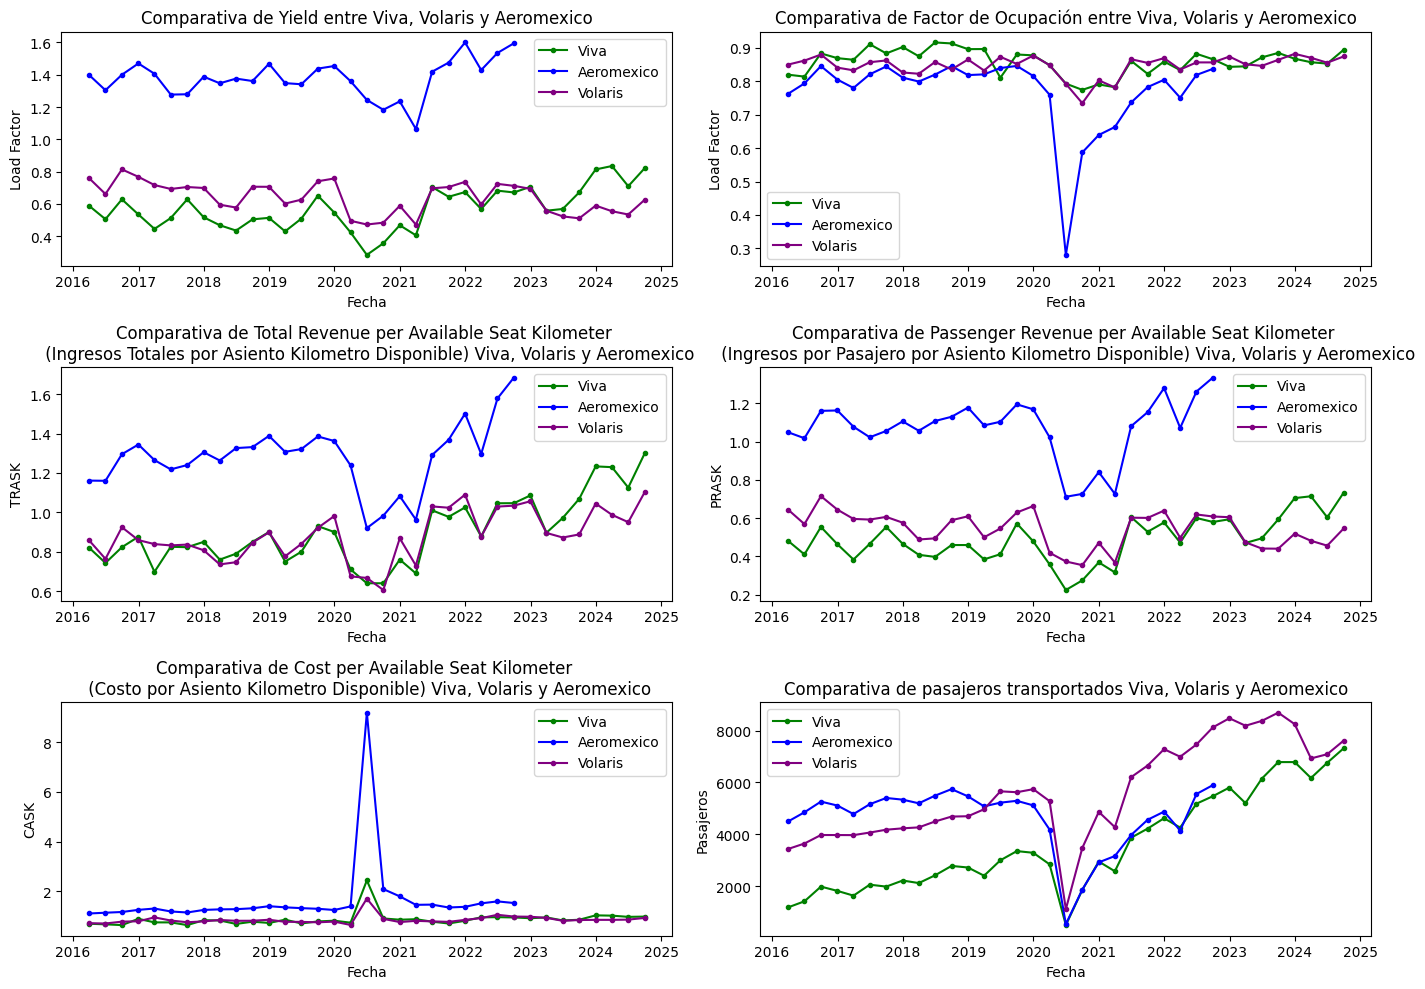

In [151]:
import matplotlib.pyplot as plt

fig, axes= plt.subplots(3,2, figsize=(14,10))

axes [0,0].plot(viva_metrics["TRIMESTRE"], viva_metrics['YIELD (PASAJE / RPK)'], label = "Viva", color="green", marker=".")
axes [0,0].plot(am_metrics["TRIMESTRE"], am_metrics['YIELD (PASAJE / RPK)'], label = "Aeromexico", color="blue", marker=".")
axes [0,0].plot(volaris_metrics["TRIMESTRE"], volaris_metrics['YIELD (PASAJE / RPK)'], label = "Volaris", color="purple", marker=".")

axes [0,0].set_title ("Comparativa de Yield entre Viva, Volaris y Aeromexico")
axes [0,0].set_xlabel("Fecha")
axes [0,0].set_ylabel("Load Factor")
axes [0,0].legend()

axes [0,1].plot(viva_metrics["TRIMESTRE"], viva_metrics['LOAD FACTOR RPK/ASK'], label = "Viva", color="green", marker=".")
axes [0,1].plot(am_metrics["TRIMESTRE"], am_metrics['LOAD FACTOR RPK/ASK'], label = "Aeromexico", color="blue", marker=".")
axes [0,1].plot(volaris_metrics["TRIMESTRE"], volaris_metrics['LOAD FACTOR RPK/ASK'], label = "Volaris", color="purple", marker=".")

axes [0,1].set_title ("Comparativa de Factor de Ocupación entre Viva, Volaris y Aeromexico")
axes [0,1].set_xlabel("Fecha")
axes [0,1].set_ylabel("Load Factor")
axes [0,1].legend()

axes [1,0].plot(viva_metrics["TRIMESTRE"], viva_metrics['TRASK (Ingreso Total / ASK)'], label = "Viva", color="green", marker=".")
axes [1,0].plot(am_metrics["TRIMESTRE"], am_metrics['TRASK (Ingreso Total / ASK)'], label = "Aeromexico", color="blue", marker=".")
axes [1,0].plot(volaris_metrics["TRIMESTRE"], volaris_metrics['TRASK (Ingreso Total / ASK)'], label = "Volaris", color="purple", marker=".")

axes [1,0].set_title ("Comparativa de Total Revenue per Available Seat Kilometer \n (Ingresos Totales por Asiento Kilometro Disponible) Viva, Volaris y Aeromexico")
axes [1,0].set_xlabel("Fecha")
axes [1,0].set_ylabel("TRASK")
axes [1,0].legend()

axes [1,1].plot(viva_metrics["TRIMESTRE"], viva_metrics['PRASK (Pasaje / ASK)'], label = "Viva", color="green", marker=".")
axes [1,1].plot(am_metrics["TRIMESTRE"], am_metrics['PRASK (Pasaje / ASK)'], label = "Aeromexico", color="blue", marker=".")
axes [1,1].plot(volaris_metrics["TRIMESTRE"], volaris_metrics['PRASK (Pasaje / ASK)'], label = "Volaris", color="purple", marker=".")

axes [1,1].set_title ("Comparativa de Passenger Revenue per Available Seat Kilometer \n (Ingresos por Pasajero por Asiento Kilometro Disponible) Viva, Volaris y Aeromexico")
axes [1,1].set_xlabel("Fecha")
axes [1,1].set_ylabel("PRASK")
axes [1,1].legend()

axes [2,0].plot(viva_metrics["TRIMESTRE"], viva_metrics['CASK (Costo Total / ASK)'], label = "Viva", color="green", marker=".")
axes [2,0].plot(am_metrics["TRIMESTRE"], am_metrics['CASK (Costo Total / ASK)'], label = "Aeromexico", color="blue", marker=".")
axes [2,0].plot(volaris_metrics["TRIMESTRE"], volaris_metrics['CASK (Costo Total / ASK)'], label = "Volaris", color="purple", marker=".")

axes [2,0].set_title ("Comparativa de Cost per Available Seat Kilometer \n (Costo por Asiento Kilometro Disponible) Viva, Volaris y Aeromexico")
axes [2,0].set_xlabel("Fecha")
axes [2,0].set_ylabel("CASK")
axes [2,0].legend()

axes [2,1].plot(viva_metrics["TRIMESTRE"], viva_metrics['TOTAL PASAJEROS (MILES)'], label = "Viva", color="green", marker=".")
axes [2,1].plot(am_metrics["TRIMESTRE"], am_metrics['TOTAL PASAJEROS (MILES)'], label = "Aeromexico", color="blue", marker=".")
axes [2,1].plot(volaris_metrics["TRIMESTRE"], volaris_metrics['TOTAL PASAJEROS (MILES)'], label = "Volaris", color="purple", marker=".")

axes [2,1].set_title ("Comparativa de pasajeros transportados Viva, Volaris y Aeromexico")
axes [2,1].set_xlabel("Fecha")
axes [2,1].set_ylabel("Pasajeros")
axes [2,1].legend()


plt.tight_layout()
plt.show()

#5.- Time series Forecast para la predicción de pasajeros transportados

El modelo de time series forecast es una técnica estadistica y de machine learning que usa información historia para predecir eventos futuros.

Se analiza información recolectada en intervalos iguales en el tiempo para identificar patrones y hacer prediciones. Algunos retos a la hora del modelado es que es un modelo que puede ser afectado por muchos factores, en este caso el COVID-19 fue un evento que marco gravemente el desempeño de las aerolineas.

Para este ejercicio usaremos los pasajeros transportados mes a mes por las aerolineas.

In [152]:
pasajeros_viva=pd.read_excel("/content/aerolineas.xlsx",sheet_name="VIVA")

In [153]:
pasajeros_am=pd.read_excel("/content/aerolineas.xlsx",sheet_name="AEROMEXICO")

In [154]:
pasajeros_volaris=pd.read_excel("/content/aerolineas.xlsx",sheet_name="VOLARIS")

In [155]:
pasajeros_viva.columns

Index(['Fecha', 'Paasajeros', 'Capacidad', 'Factor Ocupación (KILOMETROS)',
       'RPK (KILOMETROS)', 'ASK (KILOMETROS)', 'RPM (MILLAS)', 'ASM (MILLAS)',
       'Pasajeros Nacional', 'Pasajeros Internacional',
       'Factor Ocupación Nacional', 'Factor Ocupación Internacional',
       'RPM Nacional (MILLAS)', 'RPM Internacional (MILLAS)',
       'ASM Nacional (MILLAS)', 'ASM Internacional (MILLAS)'],
      dtype='object')

In [156]:
pasajeros_am.columns

Index(['Fecha', 'Paasajeros', 'Factor Ocupación (KILOMETROS)',
       'RPK (KILOMETROS)', 'ASK (KILOMETROS)', 'Psajeros Nacional',
       'Pasajeros Internacional', 'Factor Ocupación Nacional',
       'Factor Ocupación Internacional', 'RPK Nacional (KILOMETROS)',
       'RPK Internacional (KILOMETROS)', 'ASK Nacional (KILOMETROS)',
       'ASK Internacional (KILOMETROS)', 'Unnamed: 13', 'Unnamed: 14',
       'Factor Ocupación (MILLAS)', 'RPM (MILLAS)', 'ASM (MILLAS)',
       'Pasajeros Nacional', 'Pasajeros Internacional.1',
       'Factor Ocupación Nacional.1', 'Factor Ocupación Internacional.1',
       'RPM Nacional (MILLAS)', 'RPM Internacional (MILLAS)',
       'ASM Nacional (MILLAS)', 'ASM Internacional (MILLAS)'],
      dtype='object')

In [157]:
pasajeros_volaris.columns

Index(['Fecha', 'Paasajeros', 'Factor Ocupación (MILLAS)', 'RPM (MILLAS)',
       'ASM (MILLAS)', 'Pasajeros Nacional', 'Pasajeros Internacional',
       'Factor Ocupación Nacional', 'Factor Ocupación Internacional',
       'RPM Nacional (MILLAS)', 'RPM Internacional (MILLAS)',
       'ASM Nacional (MILLAS)', 'ASM Internacional (MILLAS)'],
      dtype='object')

In [158]:
pasajeros_viva=pasajeros_viva[["Fecha","Paasajeros"]]
pasajeros_am=pasajeros_am[["Fecha","Paasajeros"]]
pasajeros_volaris=pasajeros_volaris[["Fecha","Paasajeros"]]

pasajeros_viva=pasajeros_viva.rename(columns={"Paasajeros": "Pasajeros"})
pasajeros_am=pasajeros_am.rename(columns={"Paasajeros": "Pasajeros"})
pasajeros_volaris=pasajeros_volaris.rename(columns={"Paasajeros": "Pasajeros"})


In [159]:
pandemia=pd.to_datetime("2020-04-30") #fecha en que se declara brote de coronavirus como emergencia de salud pública

pasajeros_am = pasajeros_am[pasajeros_am['Fecha'] >= pandemia]
pasajeros_viva = pasajeros_viva[pasajeros_viva['Fecha'] >= pandemia]
pasajeros_volaris = pasajeros_volaris[pasajeros_volaris['Fecha'] >= pandemia]

In [160]:
pasajeros_am.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 51 to 104
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha      54 non-null     datetime64[ns]
 1   Pasajeros  54 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.3 KB


Podemos ver que no hay valores nulos en la base de datos, en el caso de haber podriamos tratar de rellenarlos con 0, la media del total de observaciones, con el valor anterior o siguiente y por ultimo interpolando los valores.

In [161]:
print(pasajeros_am.isna().sum().sum())
print(pasajeros_viva.isna().sum().sum())
print(pasajeros_volaris.isna().sum().sum())

0
0
0


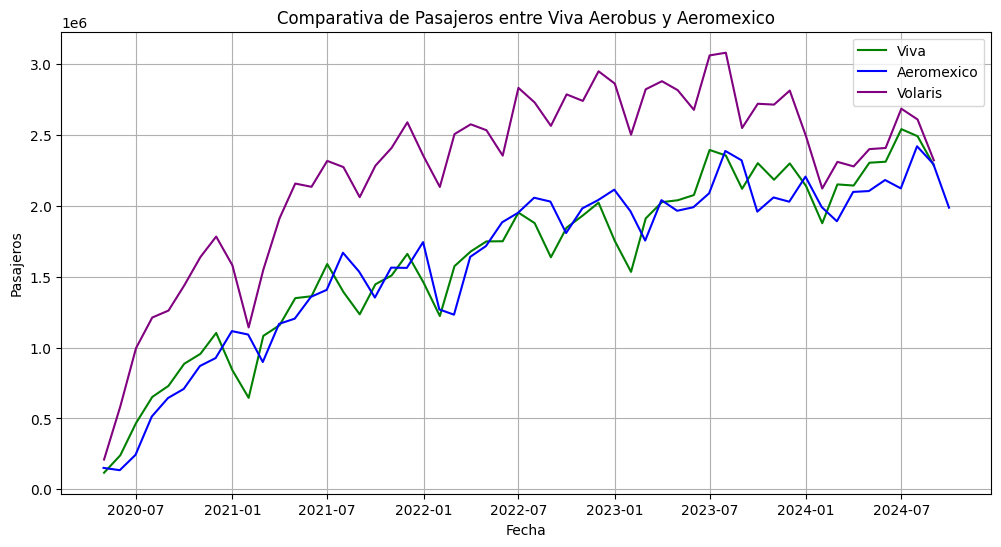

In [162]:
plt.figure(figsize=(12, 6))

plt.plot(pasajeros_viva['Fecha'], pasajeros_viva['Pasajeros'], label='Viva', color='green', marker='None')
plt.plot(pasajeros_am['Fecha'], pasajeros_am['Pasajeros'], label='Aeromexico', color='blue', marker='None')
plt.plot(pasajeros_volaris['Fecha'], pasajeros_volaris['Pasajeros'], label='Volaris', color='purple', marker='None')

plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.title('Comparativa de Pasajeros entre Viva Aerobus y Aeromexico')
plt.legend()
plt.grid(True)

plt.show()


##Estacionalidad

Algunos modelos asumen que los datos son estacionarios. La estacionariedad describe que la serie temporal tiene:

 -Una media constante y la media no
depende del tiempo

 -Varianza Constante y la varianza no depende del tiempo

 -Covarianza constante y la covarianza no tiene tiempo



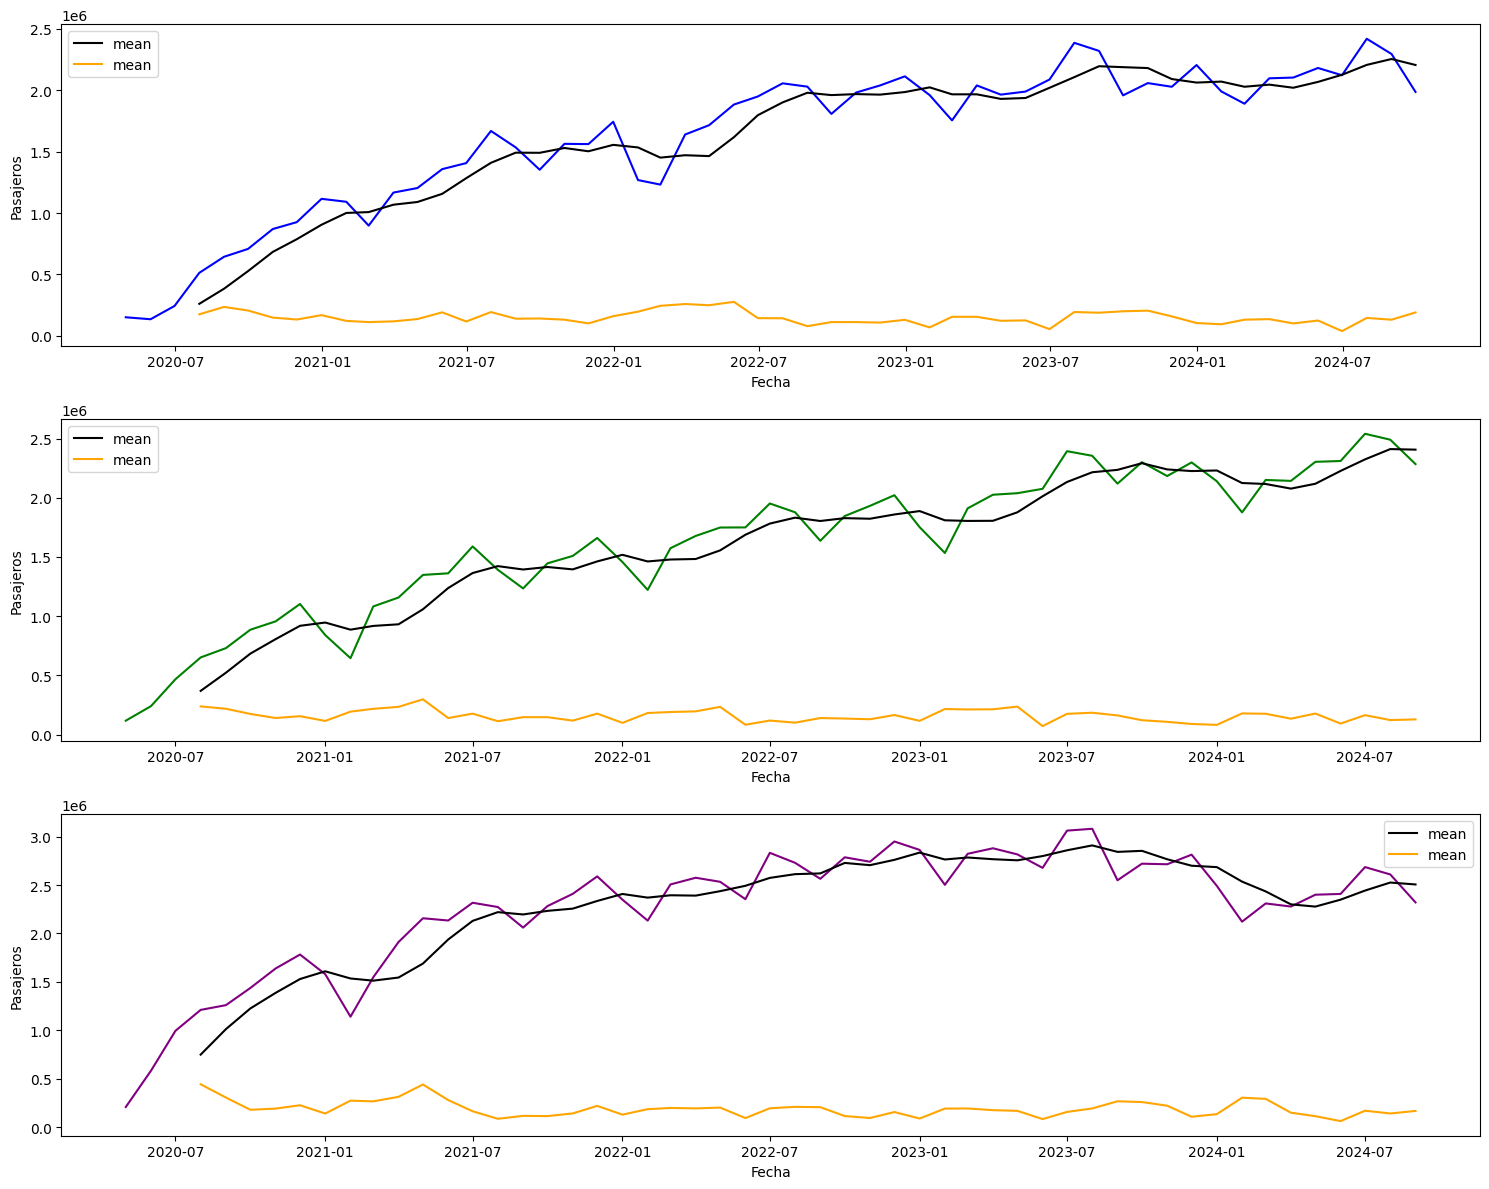

In [163]:
import seaborn as sns
weeks=4
f, ax= plt.subplots(3,1, figsize=(15,12))

sns.lineplot (x=pasajeros_am["Fecha"],y=pasajeros_am["Pasajeros"], ax=ax[0], color="blue")
sns.lineplot(x=pasajeros_am["Fecha"], y=pasajeros_am["Pasajeros"].rolling(weeks).mean(), ax=ax[0], color="black", label="mean")
sns.lineplot(x=pasajeros_am["Fecha"], y=pasajeros_am["Pasajeros"].rolling(weeks).std(), ax=ax[0], color="orange", label="mean")

sns.lineplot (x=pasajeros_viva["Fecha"],y=pasajeros_viva["Pasajeros"], ax=ax[1], color="green")
sns.lineplot(x=pasajeros_viva["Fecha"], y=pasajeros_viva["Pasajeros"].rolling(weeks).mean(), ax=ax[1], color="black", label="mean")
sns.lineplot(x=pasajeros_viva["Fecha"], y=pasajeros_viva["Pasajeros"].rolling(weeks).std(), ax=ax[1], color="orange", label="mean")

sns.lineplot (x=pasajeros_volaris["Fecha"],y=pasajeros_volaris["Pasajeros"], ax=ax[2], color="purple")
sns.lineplot(x=pasajeros_volaris["Fecha"], y=pasajeros_volaris["Pasajeros"].rolling(weeks).mean(), ax=ax[2], color="black", label="mean")
sns.lineplot(x=pasajeros_volaris["Fecha"], y=pasajeros_volaris["Pasajeros"].rolling(weeks).std(), ax=ax[2], color="orange", label="mean")

plt.tight_layout()
plt.show()

###Prueba Dickey-Fuller (ADF)

La prueba Dickey-Fuller Aumentada (ADF) es un tipo de trueba estadística conocida como prueba de raíz unitaria. Las raíces unitarias son una causa de "no estacionariedad"

Dependiendo el resultado de la prueba se pueden concluir lo siguiente:

Hipótesis Nula (H0). La serie temporal tiene una raíz unitaria (la serie temporal NO es estacionaría)

Hipótesis Alternativa (H1). La serie temporal no tiene una raíz unitaria (la serie temporal es estacionaría)


In [164]:
from statsmodels.tsa.stattools import adfuller

In [165]:
prueba_am = adfuller(pasajeros_am["Pasajeros"].values)
prueba_am

(-4.014969643835982,
 0.001334122694115997,
 11,
 42,
 {'1%': -3.596635636000432,
  '5%': -2.933297331821618,
  '10%': -2.6049909750566895},
 1115.7609732306798)

In [166]:
prueba_viva = adfuller(pasajeros_viva["Pasajeros"].values)
prueba_viva

(-4.751156897855663,
 6.737744206143443e-05,
 11,
 41,
 {'1%': -3.60098336718852,
  '5%': -2.9351348158036012,
  '10%': -2.6059629803688282},
 1083.9031754449165)

In [167]:
prueba_volaris = adfuller(pasajeros_volaris["Pasajeros"].values)
prueba_volaris

(-3.1895000120468437,
 0.020600561443828647,
 10,
 42,
 {'1%': -3.596635636000432,
  '5%': -2.933297331821618,
  '10%': -2.6049909750566895},
 1117.5289123738107)

Considerando los p-valores obtenidos en las pruebas:

Aeroméxico:
𝑝
=
0.0013
p=0.0013
Viva Aerobus:
𝑝
=
0.000067
p=0.000067
Volaris:
𝑝
=
0.0206
p=0.0206
En todos los casos, el p-valor es menor al nivel de significancia estándar del 5% lo que nos permite rechazar la hipótesis nula.

Adicionalmente, al comparar el estadístico de la prueba con los valores críticos al 1%, 5%, y 10%, observamos que el estadístico es menor que los valores críticos en cada caso. Esto refuerza nuestra decisión de rechazar la hipótesis nula.

Por lo tanto, podemos concluir con un 95% de confianza que los datos son estacionarios.

###Descomposición

La descomposición de series temporales implica considerar una serie como una combinación de los componentes: nivel, tendencia, estacionalidad y ruido.

Estos componentes se definen de la siguiente manera:


*   Nivel: El valor promedio de la serie.
*   Tendencia: El valor que aumenta o disminuye en la serie.
-Estacionalidad: El ciclo repetitivo de corto plazo en la serie.
-Ruido: La variación aleatoria en la serie.

###Cómo interpretar las gráficas:

*   Serie original (Pasajeros): Representa los datos de la serie temporal en su forma completa. Es la suma de los componentes tendencia, estacionalidad y residuos. En este caso, muestra el número de pasajeros con fluctuaciones aparentes y un crecimiento general.

*   Tendencia (Trend): Muestra la evolución a largo plazo de la serie. Aquí se observa un incremento constante en el número de pasajeros a lo largo del tiempo, lo que indica un crecimiento sostenido de la demanda o expansión de la industria.

*   Estacionalidad (Seasonal): Captura los patrones recurrentes que se repiten en intervalos regulares (por ejemplo, mensuales o anuales). En esta gráfica, se observa una variación cíclica muy marcada, lo cual podría reflejar estacionalidad en el comportamiento de los pasajeros (por ejemplo, mayor demanda durante vacaciones o temporadas específicas).

*   Residuos (Resid): Representa los valores restantes después de eliminar la tendencia y la estacionalidad. Idealmente, estos residuos deberían distribuirse aleatoriamente alrededor de cero, sin patrones evidentes. Si los residuos no son aleatorios, podría indicar que hay otros factores no explicados en el modelo.



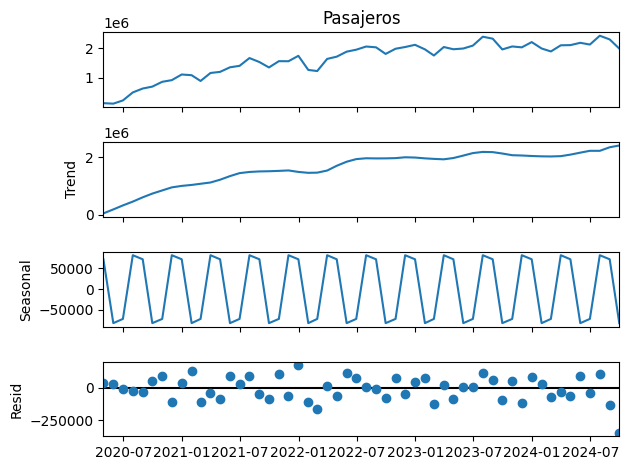

In [168]:
from statsmodels.tsa.seasonal import seasonal_decompose

pasajeros_am.set_index("Fecha", inplace=True)
decomp = seasonal_decompose(pasajeros_am["Pasajeros"], period=4, model="additive", extrapolate_trend="freq")

pasajeros_am["Pasajeros_trend"] = decomp.trend
pasajeros_am["Pasajeros_seasonal"] = decomp.seasonal
pasajeros_am["Pasajeros_residual"] = decomp.resid

decomp.plot()
plt.show()

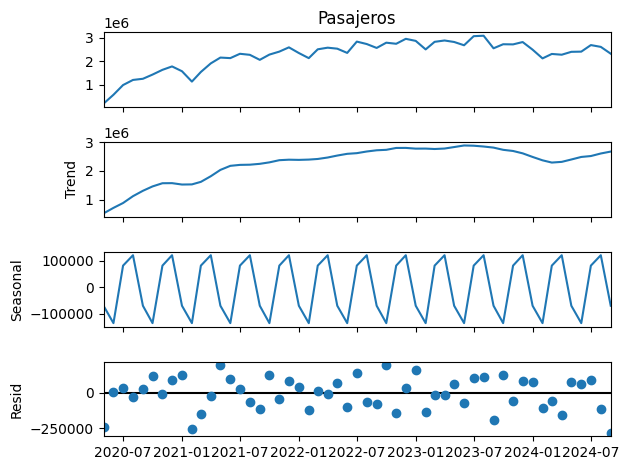

In [169]:
pasajeros_volaris.set_index("Fecha", inplace=True)
decomp = seasonal_decompose(pasajeros_volaris["Pasajeros"], period=4, model="additive", extrapolate_trend="freq")

pasajeros_volaris["Pasajeros_trend"] = decomp.trend
pasajeros_volaris["Pasajeros_seasonal"] = decomp.seasonal
pasajeros_volaris["Pasajeros_residual"] = decomp.resid

decomp.plot()
plt.show()

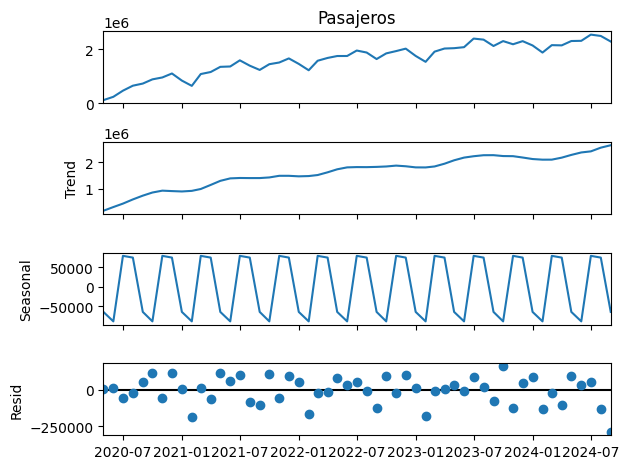

In [170]:
pasajeros_viva.set_index("Fecha", inplace=True)
decomp = seasonal_decompose(pasajeros_viva["Pasajeros"], period=4, model="additive", extrapolate_trend="freq")

pasajeros_viva["Pasajeros_trend"] = decomp.trend
pasajeros_viva["Pasajeros_seasonal"] = decomp.seasonal
pasajeros_viva["Pasajeros_residual"] = decomp.resid

decomp.plot()
plt.show()

##Analisis de Correlación

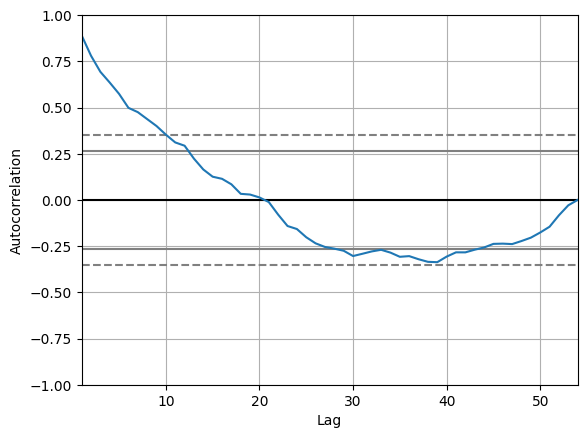

In [171]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(pasajeros_am['Pasajeros'])
plt.show()

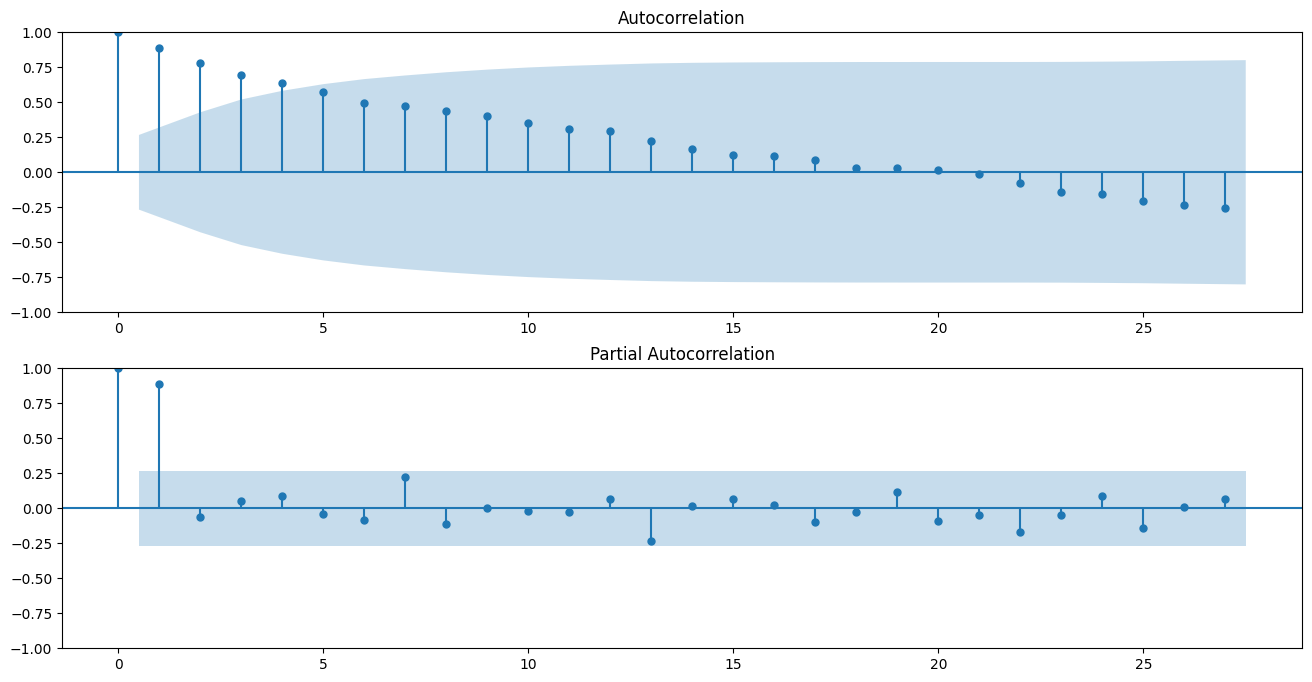

In [172]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(pasajeros_am['Pasajeros'], lags=27, ax=ax[0])
plot_pacf(pasajeros_am['Pasajeros'], lags=27, ax=ax[1])

plt.show()

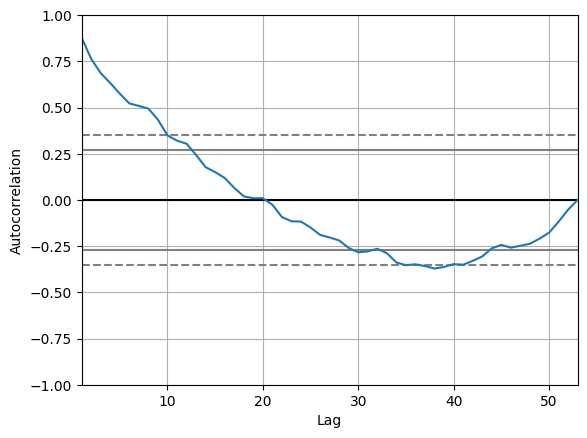

In [173]:
autocorrelation_plot(pasajeros_viva['Pasajeros'])
plt.show()

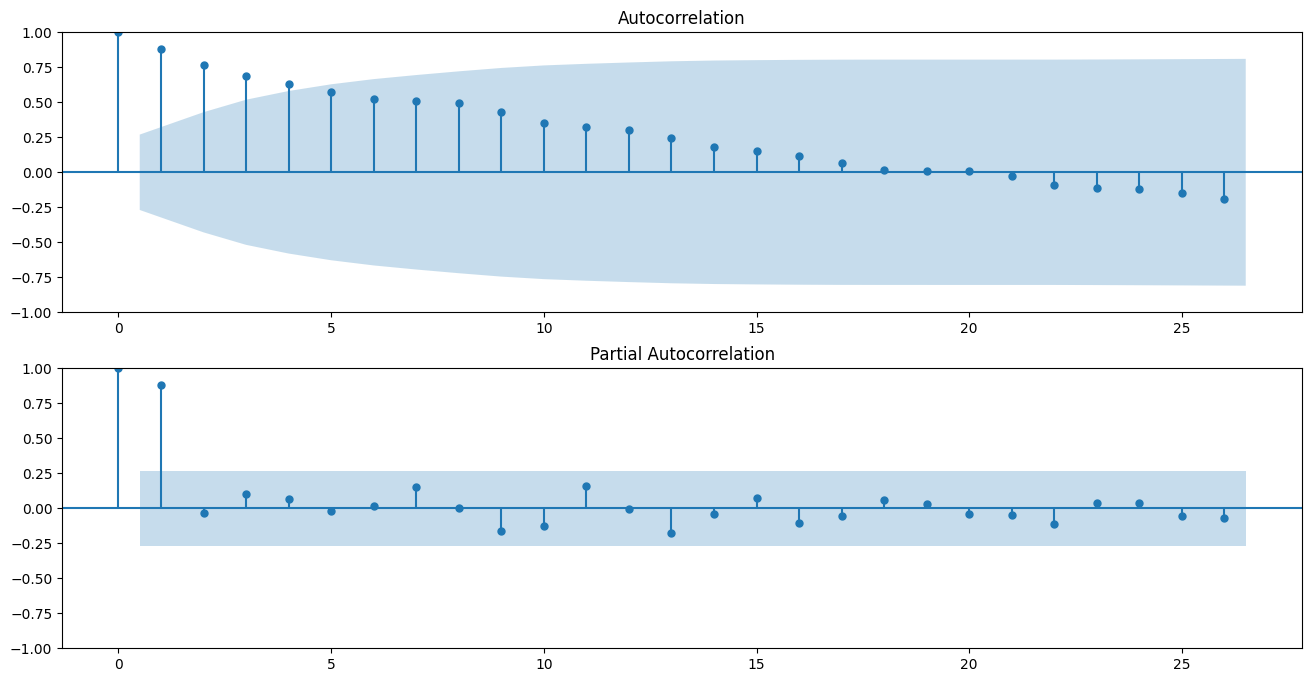

In [174]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))


plot_acf(pasajeros_viva['Pasajeros'], lags=26, ax=ax[0])
plot_pacf(pasajeros_viva['Pasajeros'], lags=26, ax=ax[1])

plt.show()

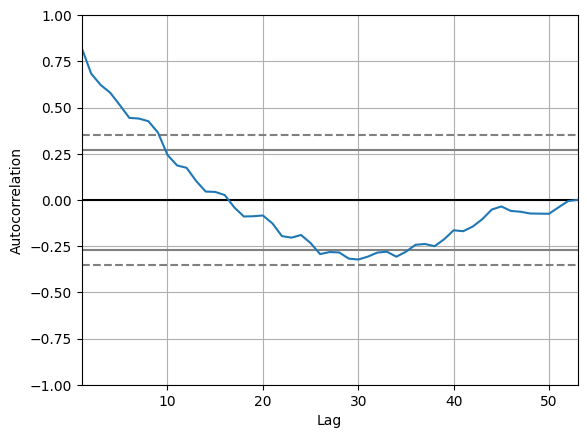

In [175]:
autocorrelation_plot(pasajeros_volaris['Pasajeros'])
plt.show()

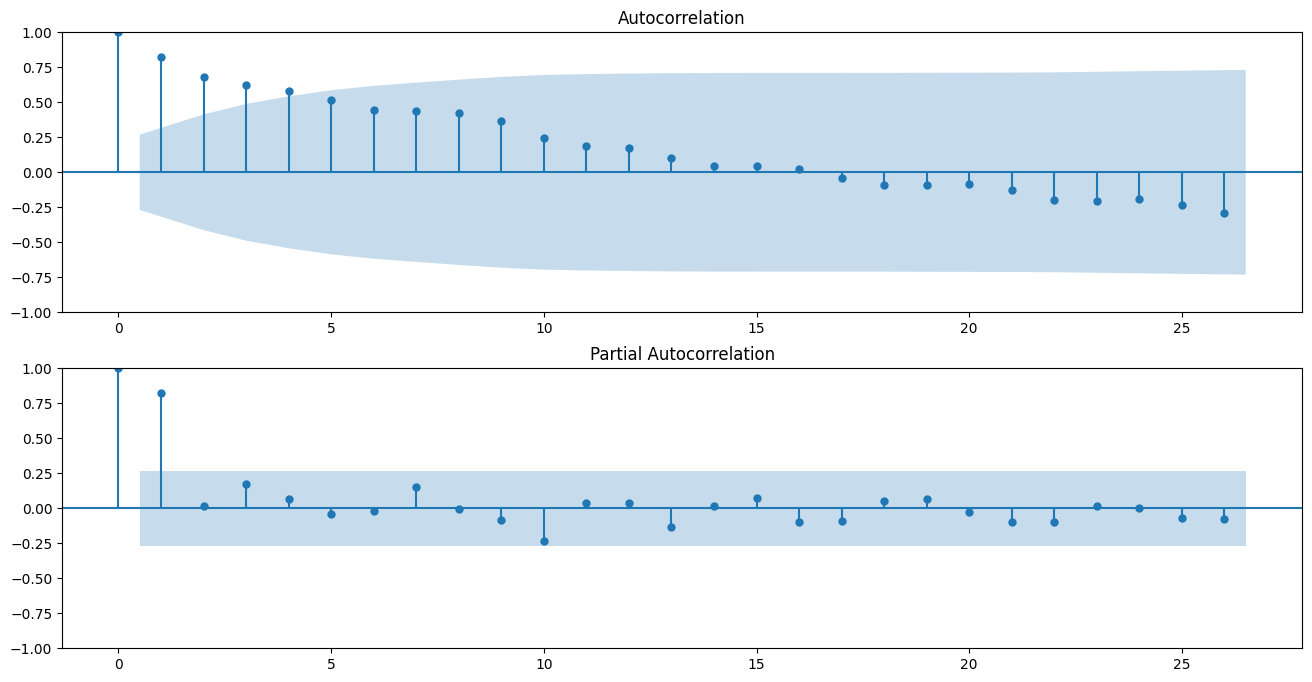

In [176]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))


plot_acf(pasajeros_volaris['Pasajeros'], lags=26, ax=ax[0])
plot_pacf(pasajeros_volaris['Pasajeros'], lags=26, ax=ax[1])

plt.show()

##Modelado
### Prophet

In [177]:
pip install prophet

In [178]:
pasajeros_am.reset_index(inplace=True)

train_size= int(0.8 * len (pasajeros_am))
test_size= len(pasajeros_am) - train_size

df_am=pasajeros_am[["Fecha","Pasajeros"]].copy()
df_am.columns= ['ds', 'y']

train = df_am.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(df_am.iloc[:train_size, 0]), pd.DataFrame(df_am.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(df_am.iloc[train_size:, 0]), pd.DataFrame(df_am.iloc[train_size:, 1])

print(len(train), len(x_valid))


43 11


In [179]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
import math

from prophet import Prophet

modelam = Prophet()
modelam.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplml71nv5/6v51vwxv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplml71nv5/02wo12vw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19381', 'data', 'file=/tmp/tmplml71nv5/6v51vwxv.json', 'init=/tmp/tmplml71nv5/02wo12vw.json', 'output', 'file=/tmp/tmplml71nv5/prophet_modelfw7l_x1i/prophet_model-20241118021435.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:14:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:14:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [180]:
y_pred = modelam.predict(x_valid)

In [181]:
pasajeros_viva.reset_index(inplace=True)

train_size2= int(0.8 * len (pasajeros_viva))
test_size2= len(pasajeros_viva) - train_size2

df_viva=pasajeros_viva[["Fecha","Pasajeros"]].copy()
df_viva.columns= ['ds', 'y']

train2 = df_viva.iloc[:train_size, :]

x_train2, y_train2 = pd.DataFrame(df_viva.iloc[:train_size2, 0]), pd.DataFrame(df_viva.iloc[:train_size2, 1])
x_valid2, y_valid2 = pd.DataFrame(df_viva.iloc[train_size2:, 0]), pd.DataFrame(df_viva.iloc[train_size2:, 1])

print(len(train2), len(x_valid2))

43 11


In [182]:
modelviva = Prophet()

modelviva.fit(train2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplml71nv5/q69x8kpy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplml71nv5/i9qjslv3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12604', 'data', 'file=/tmp/tmplml71nv5/q69x8kpy.json', 'init=/tmp/tmplml71nv5/i9qjslv3.json', 'output', 'file=/tmp/tmplml71nv5/prophet_modela9tsqavw/prophet_model-20241118021436.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:14:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:14:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [183]:
y_pred2 = modelviva.predict(x_valid2)

In [184]:
pasajeros_volaris.reset_index(inplace=True)

train_size3= int(0.8 * len (pasajeros_volaris))
test_size3= len(pasajeros_volaris) - train_size3

df_volaris=pasajeros_volaris[["Fecha","Pasajeros"]].copy()
df_volaris.columns= ['ds', 'y']

train3 = df_viva.iloc[:train_size3, :]

x_train3, y_train3 = pd.DataFrame(df_volaris.iloc[:train_size3, 0]), pd.DataFrame(df_volaris.iloc[:train_size3, 1])
x_valid3, y_valid3 = pd.DataFrame(df_volaris.iloc[train_size3:, 0]), pd.DataFrame(df_volaris.iloc[train_size3:, 1])

print(len(train3), len(x_valid3))

42 11


In [185]:
modelvolaris = Prophet()

modelvolaris.fit(train3)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplml71nv5/fc4sh9km.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplml71nv5/_e280yk9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74009', 'data', 'file=/tmp/tmplml71nv5/fc4sh9km.json', 'init=/tmp/tmplml71nv5/_e280yk9.json', 'output', 'file=/tmp/tmplml71nv5/prophet_modelxao70le5/prophet_model-20241118021437.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:14:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:14:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [186]:
y_pred3 = modelvolaris.predict(x_valid3)


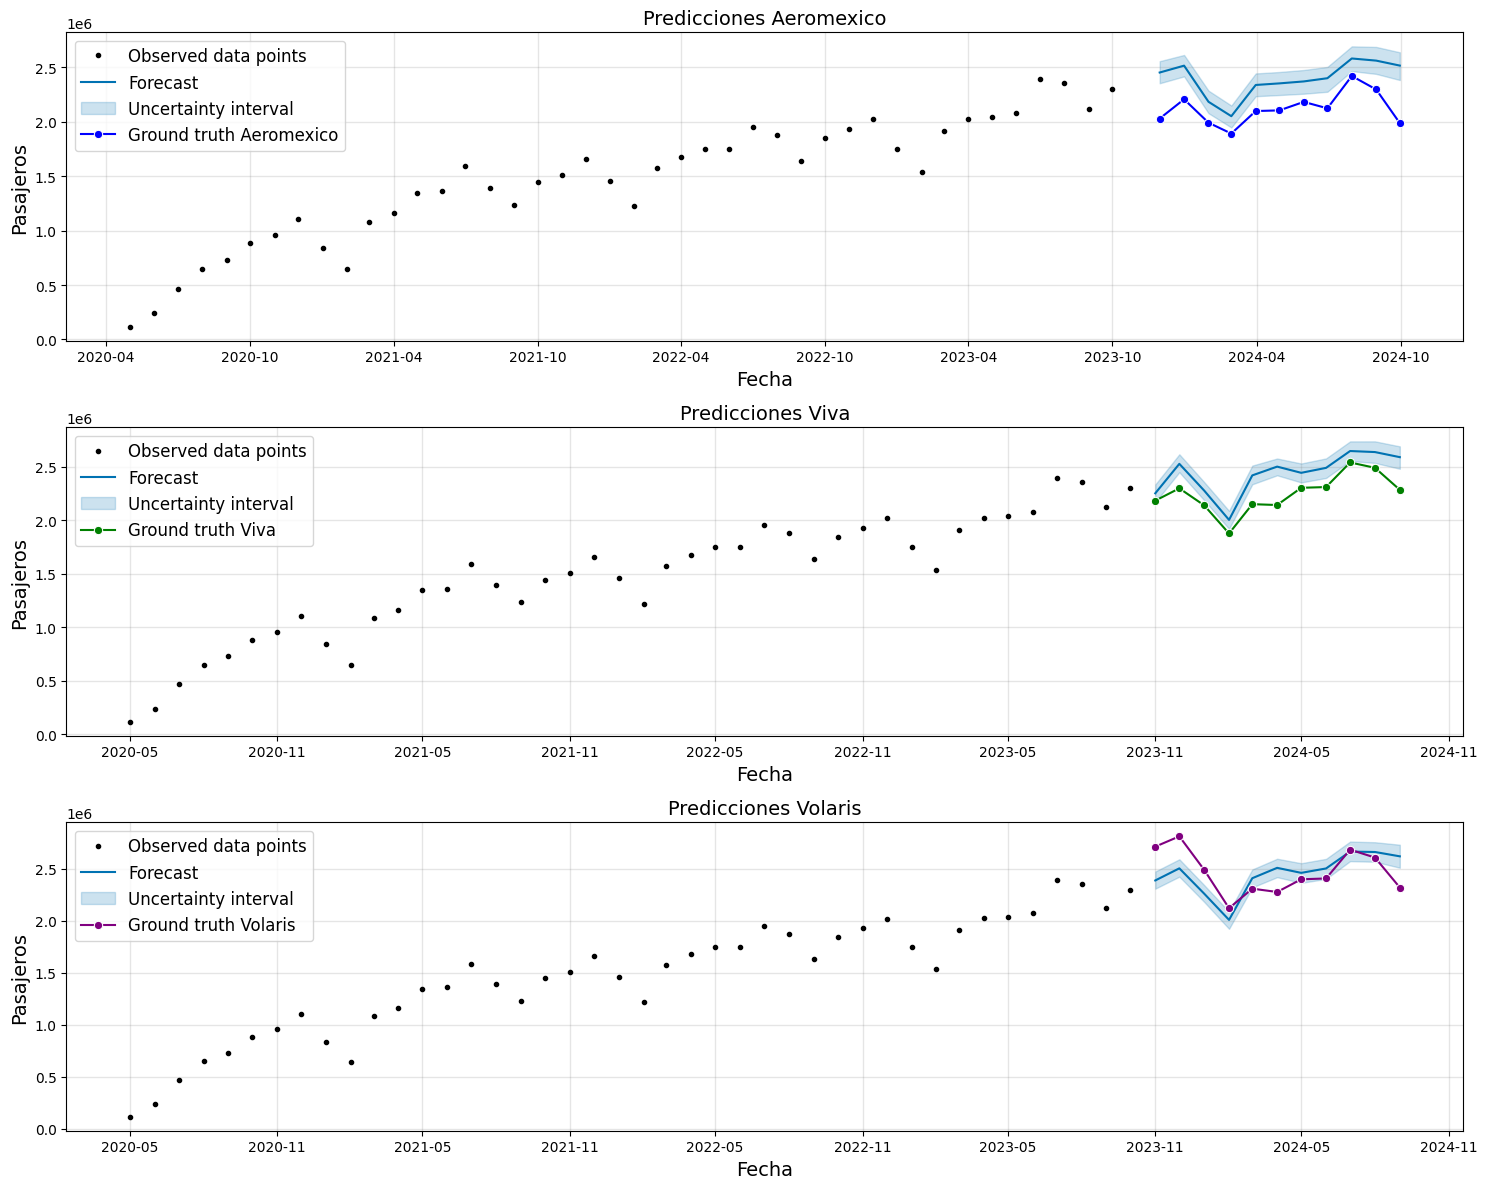

In [187]:
fig, axes= plt.subplots(3,1, figsize=(15,12))

model.plot(y_pred, ax=axes[0])
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=axes[0], color='blue', label='Ground truth Aeromexico',marker="o")

axes[0].set_title(f'Predicciones Aeromexico', fontsize=14)
axes[0].set_xlabel('Fecha', fontsize=14)
axes[0].set_ylabel('Pasajeros', fontsize=14)
axes[0].legend(loc='upper left', fontsize=12)

model.plot(y_pred2, ax=axes[1])
sns.lineplot(x=x_valid2['ds'], y=y_valid2['y'], ax=axes[1], color='green', label='Ground truth Viva',marker="o")

axes[1].set_title(f'Predicciones Viva', fontsize=14)
axes[1].set_xlabel('Fecha', fontsize=14)
axes[1].set_ylabel('Pasajeros', fontsize=14)
axes[1].legend(loc='upper left', fontsize=12)

model.plot(y_pred3, ax=axes[2])
sns.lineplot(x=x_valid3['ds'], y=y_valid3['y'], ax=axes[2], color='purple', label='Ground truth Volaris',marker="o")

axes[2].set_title(f'Predicciones Volaris', fontsize=14)
axes[2].set_xlabel('Fecha', fontsize=14)
axes[2].set_ylabel('Pasajeros', fontsize=14)
axes[2].legend(loc='upper left', fontsize=12)

plt.tight_layout()

plt.show()


Entrenado el modelo podemos intentar predecir la cantidad de pasajeros que cada aerolinea va a transportar para el mes de diciembre.

Creamos una base con fechas y le pasamos esto a cada modelo individual para que genera las predicciones por aerolinea.

In [191]:
from datetime import datetime, timedelta
import pandas as pd

start=datetime(2024,12,1)
end=datetime(2024,12,31)
dates = pd.date_range(start,end)

futuro = pd.DataFrame({"ds":dates})

In [193]:
futuro.head(5)

,ds
0,2024-12-01
1,2024-12-02
2,2024-12-03
3,2024-12-04
4,2024-12-05


In [195]:
forecastam=modelam.predict(futuro)
forecastviva=modelviva.predict(futuro)
forecastvolaris=modelvolaris.predict(futuro)

In [196]:
predicciones_am=forecastam[["ds","yhat","yhat_lower","yhat_upper"]]
predicciones_viva=forecastviva[["ds","yhat","yhat_lower","yhat_upper"]]
predicciones_volaris=forecastvolaris[["ds","yhat","yhat_lower","yhat_upper"]]

In [200]:
predicciones_am.tail(10)

,ds,yhat,yhat_lower,yhat_upper
21,2024-12-22,3.319737e+06,3.219224e+06,3.411084e+06
22,2024-12-23,3.357885e+06,3.255238e+06,3.461203e+06
23,2024-12-24,3.367305e+06,3.260196e+06,3.471015e+06
24,2024-12-25,3.347728e+06,3.247786e+06,3.457822e+06
25,2024-12-26,3.299715e+06,3.194868e+06,3.411125e+06
26,2024-12-27,3.224627e+06,3.118804e+06,3.328272e+06
27,2024-12-28,3.124562e+06,3.022381e+06,3.226842e+06
28,2024-12-29,3.002282e+06,2.891349e+06,3.105417e+06
29,2024-12-30,2.861117e+06,2.754797e+06,2.964514e+06
30,2024-12-31,2.704863e+06,2.606390e+06,2.807319e+06


In [201]:
predicciones_viva.tail(10)

,ds,yhat,yhat_lower,yhat_upper
21,2024-12-22,3.556786e+06,3.478000e+06,3.635478e+06
22,2024-12-23,3.544884e+06,3.456009e+06,3.624436e+06
23,2024-12-24,3.509892e+06,3.425912e+06,3.588652e+06
24,2024-12-25,3.452027e+06,3.369214e+06,3.533929e+06
25,2024-12-26,3.372181e+06,3.283654e+06,3.457995e+06
26,2024-12-27,3.271890e+06,3.183890e+06,3.361782e+06
27,2024-12-28,3.153286e+06,3.069444e+06,3.232955e+06
28,2024-12-29,3.019035e+06,2.937347e+06,3.102613e+06
29,2024-12-30,2.872255e+06,2.785643e+06,2.947811e+06
30,2024-12-31,2.716425e+06,2.630819e+06,2.794643e+06


In [202]:
predicciones_volaris.tail(10)

,ds,yhat,yhat_lower,yhat_upper
21,2024-12-22,3.168953e+06,3.079400e+06,3.255380e+06
22,2024-12-23,3.161753e+06,3.075277e+06,3.242202e+06
23,2024-12-24,3.142093e+06,3.059916e+06,3.224469e+06
24,2024-12-25,3.109837e+06,3.020277e+06,3.191487e+06
25,2024-12-26,3.065238e+06,2.983609e+06,3.147318e+06
26,2024-12-27,3.008933e+06,2.920402e+06,3.095234e+06
27,2024-12-28,2.941926e+06,2.859700e+06,3.019469e+06
28,2024-12-29,2.865559e+06,2.781311e+06,2.945623e+06
29,2024-12-30,2.781475e+06,2.690682e+06,2.865216e+06
30,2024-12-31,2.691570e+06,2.609588e+06,2.778238e+06


##SARIMAX

---EN PROCESO---